# Prerequisites

- Python installed on your machine
- Pip: package management system (it comes with Python)
- Jupyter Notebook: an online editor for data visualization
- Pandas: a library to create data frames from data sets and prepare data for plotting\
- Numpy: a library for multi-dimensional arrays
- Matplotlib: a plotting library
- Seaborn: a plotting library (we’ll only use part of its functionally to add a gray grid to the plot and get rid of borders)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import json
import numpy as np
import seaborn as sns
sns.set()
%matplotlib notebook


# Data Preparation

We plan to create a Matplotlib grouped bar chart that will show the top 20 ASNs in the DRC with their rank and their number of announcing addresses. 

Read the asnrank file generated by our GetData.py file

In [2]:
DRC_rank= pd.read_csv('drc_asnran.csv', sep ='\t')

In [3]:
DRC_rank = DRC_rank[['asn.asn','asn.asnName','asn.rank','asn.organization.orgId','asn.organization.orgName',
                      'asn.longitude','asn.latitude','asn.asnDegree.provider','asn.asnDegree.customer',
                      'asn.asnDegree.total','asn.asnDegree.transit','asn.asnDegree.sibling','asn.announcing.numberPrefixes',
                      'asn.announcing.numberAddresses']]

In [4]:
pd.options.display.float_format = '{:,.0f}'.format
DRC_rank.head()

,asn.asn,asn.asnName,asn.rank,asn.organization.orgId,asn.organization.orgName,asn.longitude,asn.latitude,asn.asnDegree.provider,asn.asnDegree.customer,asn.asnDegree.total,asn.asnDegree.transit,asn.asnDegree.sibling,asn.announcing.numberPrefixes,asn.announcing.numberAddresses
0,"327,937",Smile-Communication-DRC,"73,745",0a2c0d44cf,Smile Communication DRC,0,0,0,0,0,0,0,0,0
1,"328,452",ISPA-RDC-LUBUX-MGMT,"7,902",dffe8b37f6,Internet service provider association - DRC,15,-4,2,1,3,3,0,1,512
2,"37,638",Orioncom,"8,921",9b5c461878,Orioncom SPRL,17,-5,6,1,7,3,0,14,"2,816"
3,"328,344",STETechplus-AS,"25,582",54a3e70bfd,STE Techplus SARL,29,-2,3,0,3,0,0,4,"2,048"
4,"328,601",Compagnie-Financiere-du-Congo-AS,"38,447",7ca8f59b01,Compagnie Financiere du Congo S.a.r.l.,15,-4,1,0,1,0,0,4,"1,024"


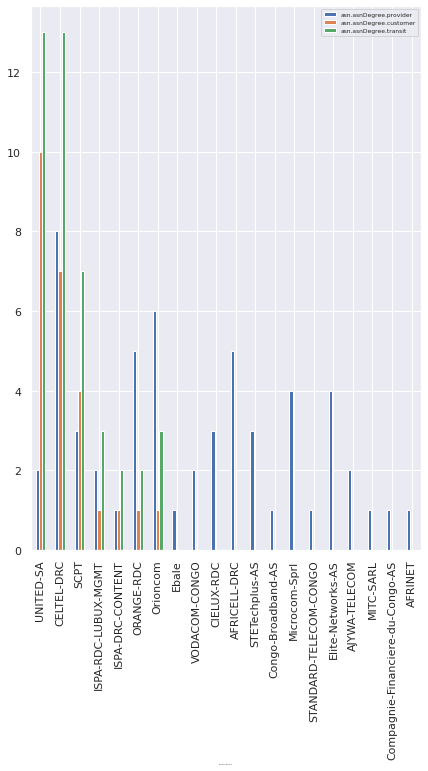

In [87]:
DRC_rank = DRC_rank.sort_values(['asn.rank'], ascending=True)
top20_ranks =DRC_rank.iloc[0:20]
plt.rcParams["figure.figsize"] = (7,10)
plt.rc('axes', labelsize=2) 
top20_ranks.plot(x = 'asn.asnName', y = ['asn.asnDegree.provider','asn.asnDegree.customer','asn.asnDegree.transit'], kind = 'bar')
plt.legend(loc=1, prop={'size': 6})

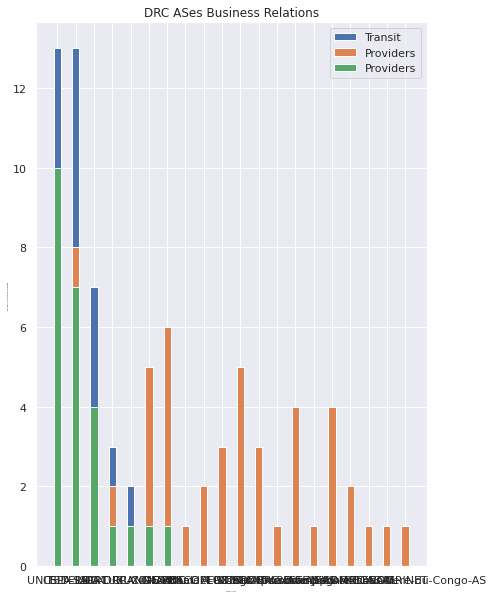

In [100]:
w=0.4

asnnames = top20_ranks['asn.asnName'].values
transits = top20_ranks['asn.asnDegree.transit']
providers = top20_ranks['asn.asnDegree.provider']
customers = top20_ranks['asn.asnDegree.customer']

plt.bar(asnnames,transits,w, label="Transit")
plt.bar(asnnames,providers,w, label="Providers")
plt.bar(asnnames,customers,w, label="Providers")

plt.xlabel("DRC ASes")
plt.ylabel("Providers-Customers-Transits")
plt.title("DRC ASes Business Relations")
plt.legend()
plt.show()

In [7]:
import seaborn as sns
%matplotlib inline



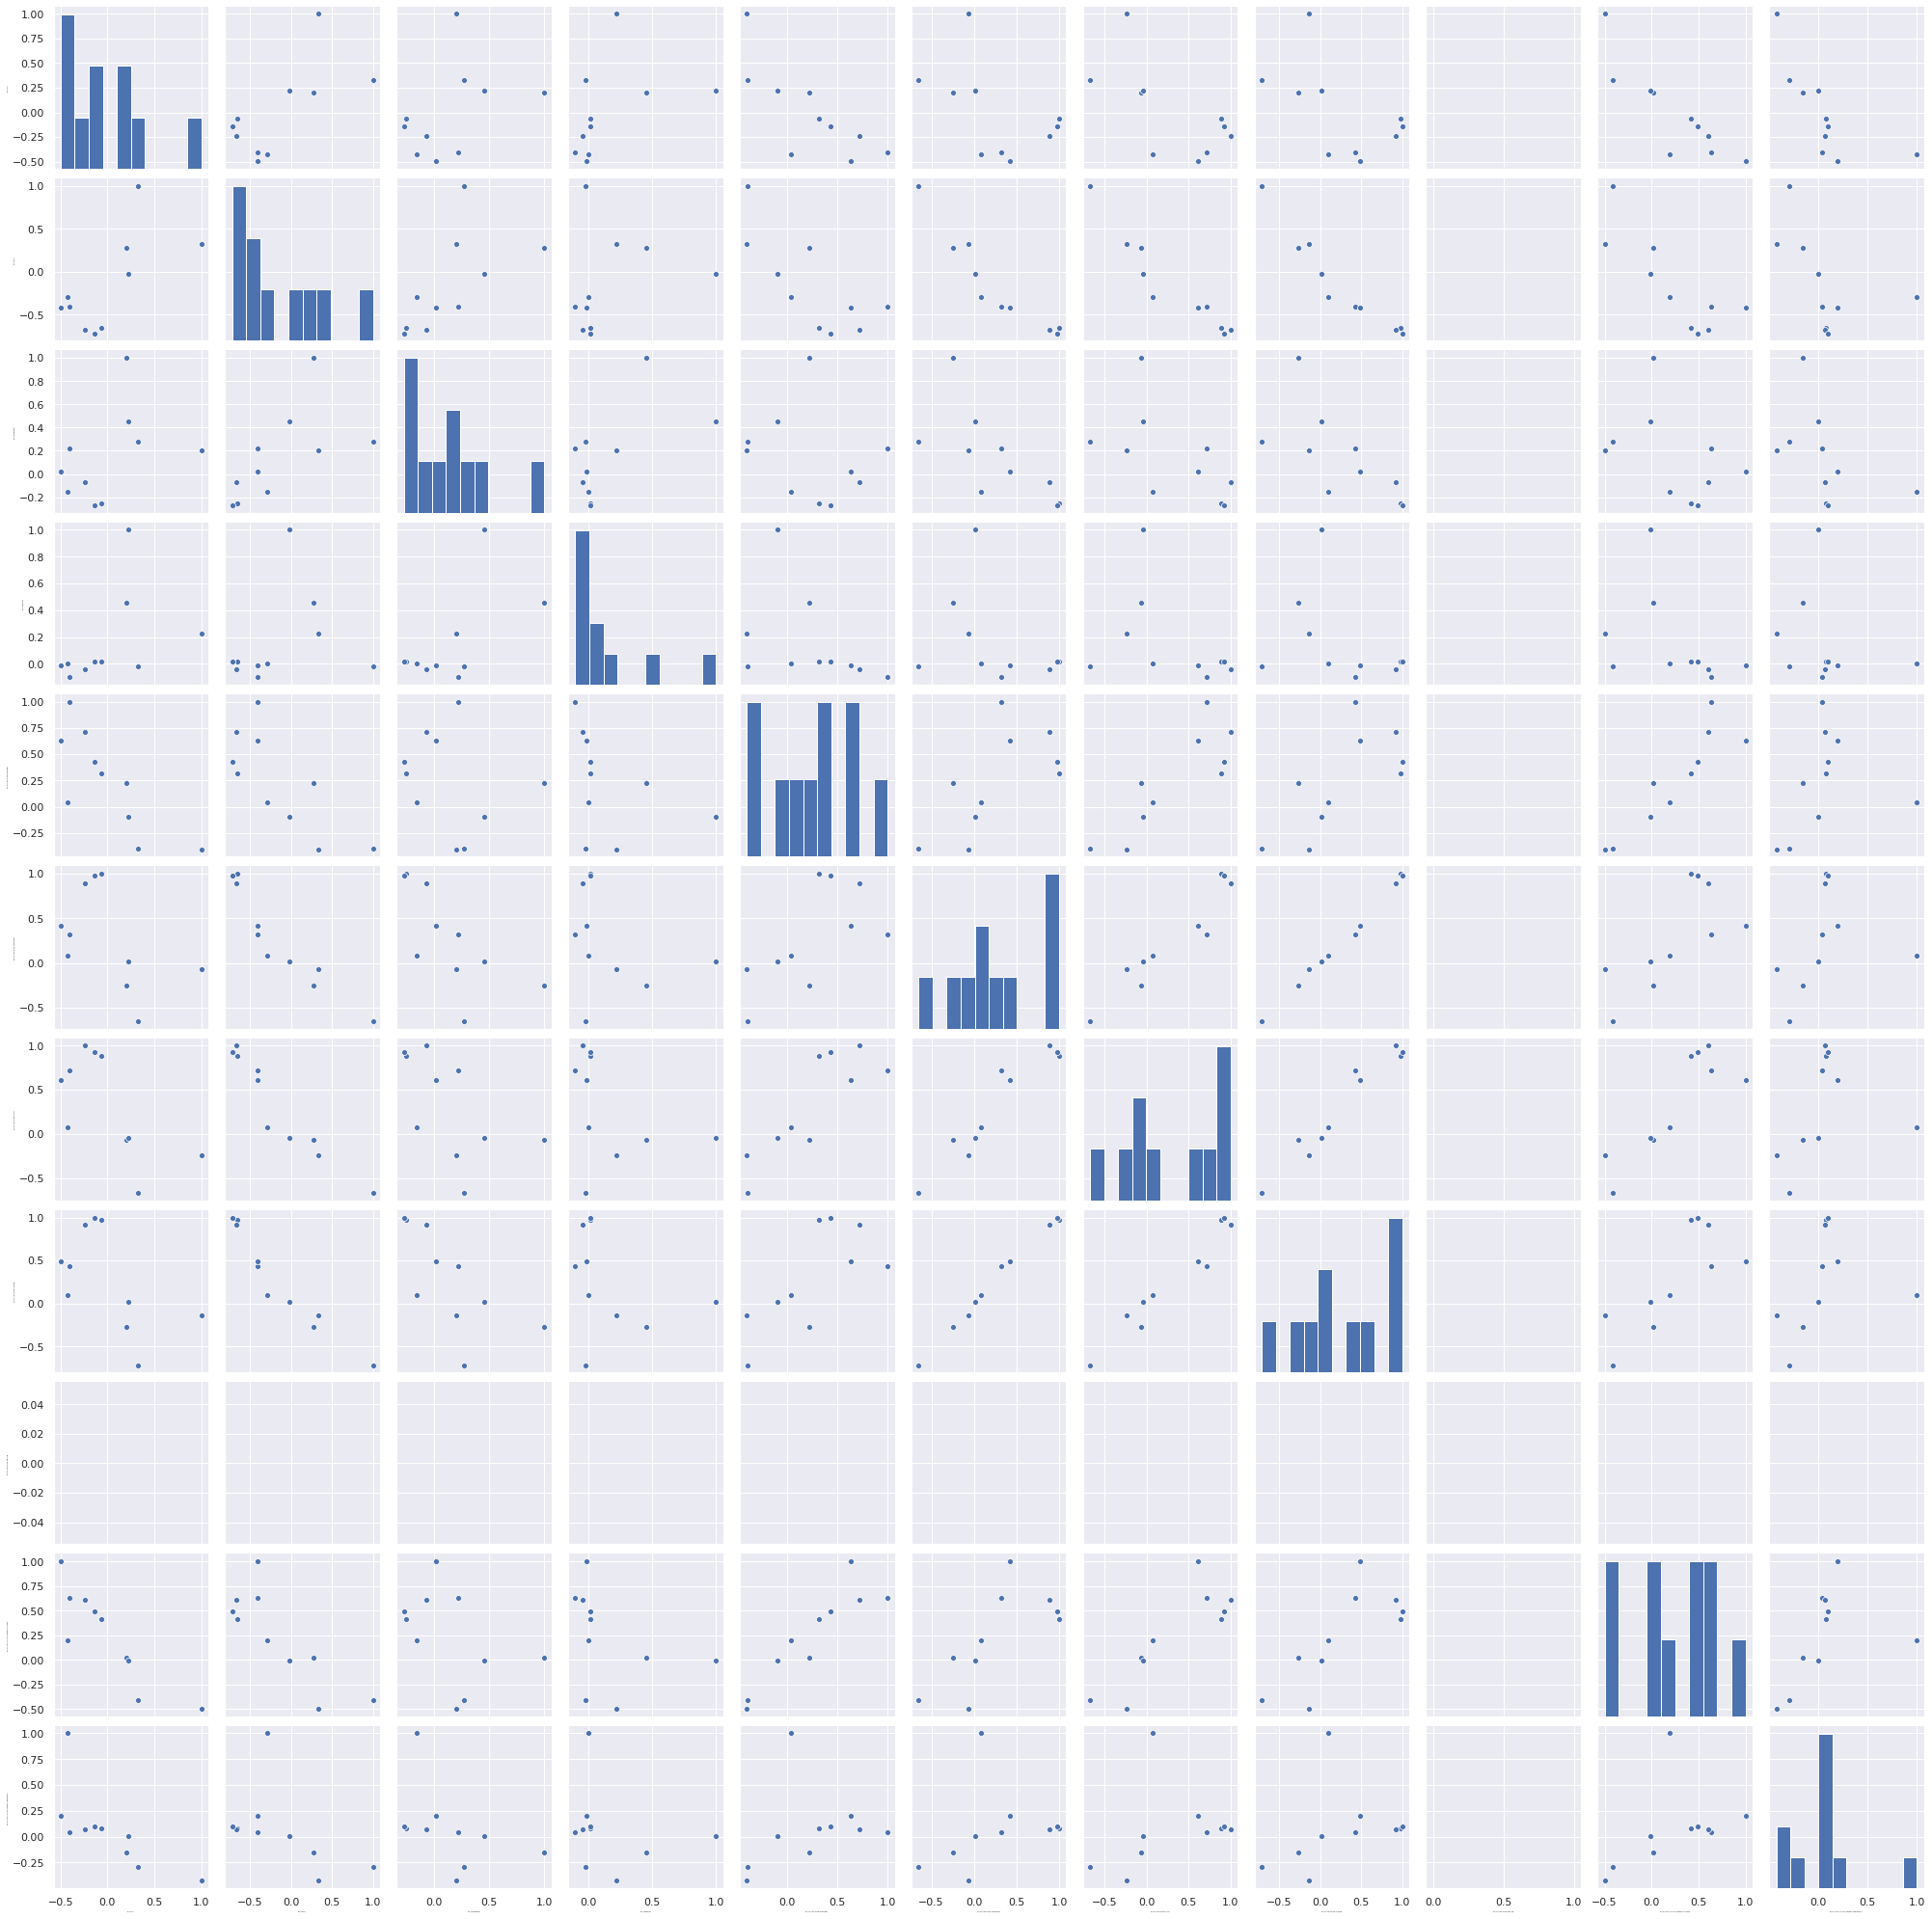

In [8]:
sns.pairplot(top20_ranks.corr())

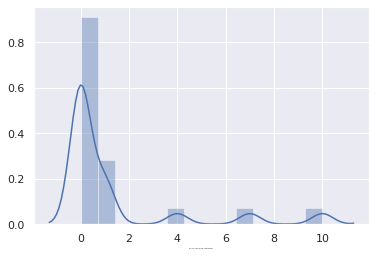

In [9]:
sns.distplot(top20_ranks['asn.asnDegree.customer'])

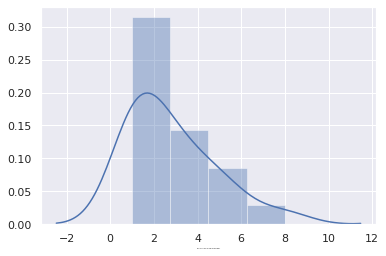

In [10]:
sns.distplot(top20_ranks['asn.asnDegree.provider'])

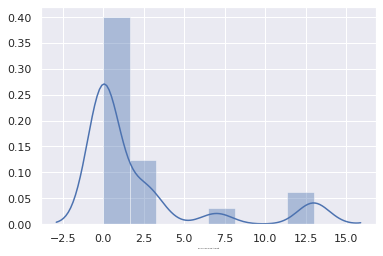

In [11]:
sns.distplot(top20_ranks['asn.asnDegree.transit'])

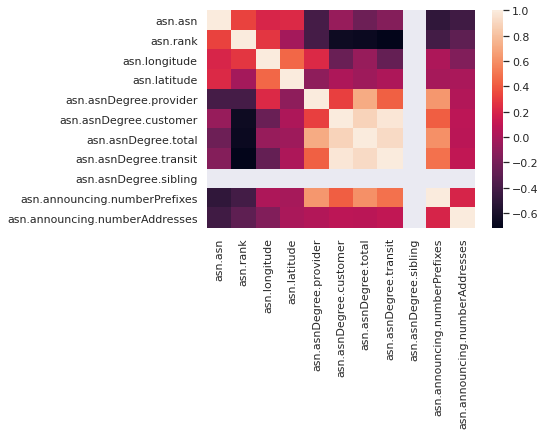

In [12]:
sns.heatmap(top20_ranks.corr())

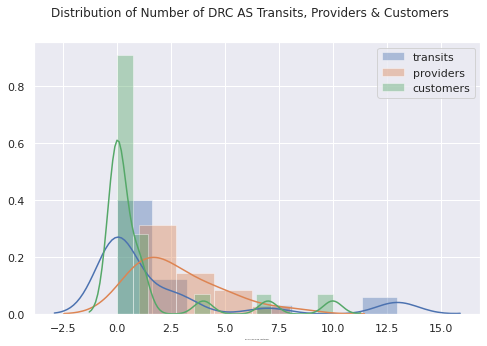

In [76]:
fig, axes = plt.subplots(1,1, sharex=True, figsize=(8,5))
fig.suptitle('Distribution of Number of DRC AS Transits, Providers & Customers')
#axes[0].set_title('Title of the first chart')

transits = top20_ranks['asn.asnDegree.transit']
providers = top20_ranks['asn.asnDegree.provider']
customers = top20_ranks['asn.asnDegree.customer']

sns.distplot(transits,label='transits')
sns.distplot(providers, label='providers')
sns.distplot(customers,label='customers')

plt.legend()
plt.show()

We select the top 20 ASNs and construct a new dataframe based on which we shall visualize the data

In [51]:
DRC_rank = DRC_rank.sort_values(['asn.rank'], ascending=True)
top20_ranks =DRC_rank['asn.rank'][0:20]
top20_asns =DRC_rank['asn.asnName'][0:20]
top20_nAddress = DRC_rank['asn.announcing.numberAddresses'][0:20]
top20_nPrefixes = DRC_rank['asn.announcing.numberPrefixes'][0:20]
top20 = pd.concat([top20_ranks,top20_asns,top20_nAddress,top20_nPrefixes], axis=1)

In [52]:

top20.head()

,asn.rank,asn.asnName,asn.announcing.numberAddresses,asn.announcing.numberPrefixes
34,"2,282",UNITED-SA,"2,816",11
5,"2,600",CELTEL-DRC,"12,800",37
9,"3,502",SCPT,"2,048",9
1,"7,902",ISPA-RDC-LUBUX-MGMT,512,1
17,"7,906",ISPA-DRC-CONTENT,512,1


We’ll use this piece of data frame with multiple columns to create our Matplotlib bar chart.

# Plotting the data

We’ll create a Matplotlib chart with double bars in 5 steps. Here’s the list of variables that will be used in our code. 
Values or names can be changed as we like.

In [ ]:
# Variables
rank_bar = top20['asn.rank']
rank_bar_label = 'ASN rank'
rank_bar_color = '#32628d'
address_bar = top20['asn.announcing.numberAddresses']
address_bar_label = 'Number of announcing Addresses '
address_bar_color = '#cde01d'
labels = top20['asn.asnName']
width = 0.4  # the width of the bars
plot_title = 'Top 20 DRC asns by Rank and Announcing Addresses'
title_size = 18
subtitle = 'Source: CAIDA / AsnRank API V2'
filename = 'rank_addresses_plot'

## 1. Create subplots

First, sort data for plotting:

In [ ]:
#top20.sort_values(by='asn.announcing.numberAddresses', inplace=True, ascending=True)
top20.sort_values(by='asn.rank', inplace=True, ascending=True)

Next, draw a figure with a subplot.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()

figsize=(10,6) creates a 1000 × 600 px figure.

plt.tight_layout() adjusts subplot params so that subplots are nicely fit in the figure.

## 2. Create bars

In [ ]:
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, rank_bar, width, label=rank_bar_label, color=rank_bar_color)
ax.barh(y - width/2, address_bar, width, label=address_bar_label, color=address_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

ax.bar() would create vertical bar plots, while ax.barh() would draw horizontal bar plots. We’re using Matplotlib barh, and our chart will have a horizontal layout.

We’re also using set_major_formatter() to format ticks with commas (like 1,500 or 2,000).

## 3. Set title and subtitle

In [ ]:
# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))
    

pad=20 sets the title’s padding, and .35 sets its left margin.

subplots_adjust() prevents the title and labels from being cropped.

## 4. Create bar labels/annotations

Since we’re creating a Python bar graph with labels, we need to define label values and label position. 

To label bars with values, we’ll use the following function:

In [ ]:
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

Finally, we set y-axis labels and the legend:

In [ ]:
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))

## 5. Save the chart as a picture

In [ ]:
        
plt.savefig(filename+'.png', facecolor=(.94, .94, .94))